
### Project by :Preeti Kokate
### Importing required libraries and data 

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Importing data
data = pd.read_csv("Churn.csv")

# Let's see how the data looks..!
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

First, let's check what columns our data holds.

In [3]:
# Checking columns in our data
print(data.columns)

print("\nTotal columns : ", len(data.columns))

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Total columns :  21


Our data contains total 21 columns. Now we need to take a look at data summary. Summary can be generated by using inbuilt function describe()

**Note** : By default, summary is generated considering **numerical features** only.

### Data Summary

In [4]:
# Data Summary
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


It seems something weird...right? We can see some numerical columns like TotalCharges in our data but they are not displayed in  data summary. SeniorCitizen values should be categorical but they are looking like integer.

Checking their datatype will be useful for further processing. Here I'm using info() function for checking datatype as well as total number of records which will help for checking missing values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Converting TotalCharges to numerical and SeniorCitizen to categorical.
data["TotalCharges"] = pd.to_numeric(data.TotalCharges, errors='coerce')
data["SeniorCitizen"] = data["SeniorCitizen"].astype(str)

In [7]:
# Checking data types of each column.
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now data is looking normal..!

## Handling missing values

In [8]:
# By using error as coerce some invalid values will be set to NaN. Let's check for any missing values.
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see, some missing values found in data. As our data is comparatively large, we can handle missing values by simply removing them.

In [9]:
# Removing missing values.
data = data.dropna()
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values are removed successfully..!

## Checking for any outliers
I am using **IQR (Inter Quartile Range)** method to find outliers.


![title](https://www.statisticshowto.com/wp-content/uploads/2012/03/iqr.jpg)

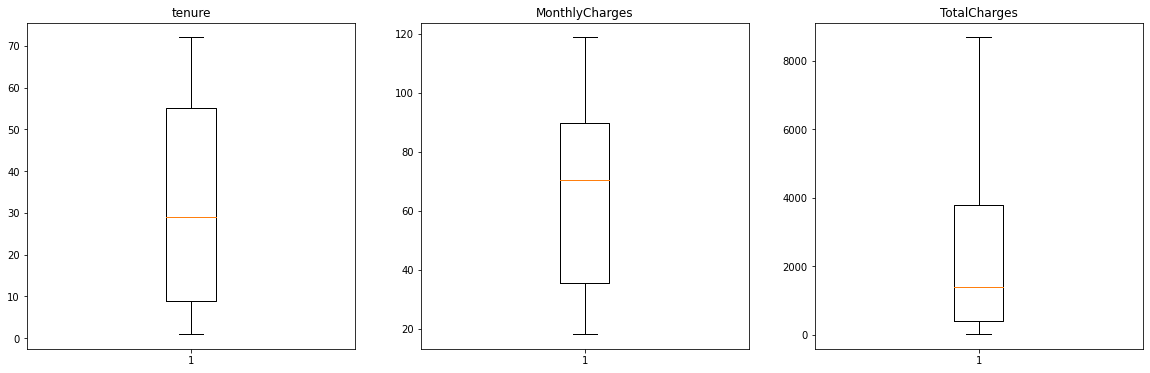

In [10]:
# checking for outliers in numerical columns
plt.figure(figsize = (20,6))
count = 1
for col in data.columns:
    if(data[col].dtype != 'O'):
        plt.subplot(1,3,count)
        plt.boxplot(data[col])
        plt.title(col)
        count +=1
              
plt.show()

In [11]:
# Calculating percentiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# IQR = Inter Quartile Range
IQR = Q3 - Q1

In [12]:
# Checking for any outliers
print(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

Churn               0
Contract            0
Dependents          0
DeviceProtection    0
InternetService     0
MonthlyCharges      0
MultipleLines       0
OnlineBackup        0
OnlineSecurity      0
PaperlessBilling    0
Partner             0
PaymentMethod       0
PhoneService        0
SeniorCitizen       0
StreamingMovies     0
StreamingTV         0
TechSupport         0
TotalCharges        0
customerID          0
gender              0
tenure              0
dtype: int64


**Great...! No OUTLIERS detected..!**

Moving forward, as we can see there is no need of customerID column in our data, I'm going to drop it.

In [13]:
data.drop("customerID", axis=1, inplace=True)

## Data Visualization
**Target variable : Churn**

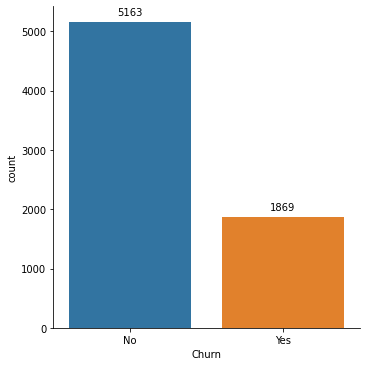

In [14]:
# Counting total churn
churn = sns.catplot(x="Churn", kind="count", data=data)

for ax in churn.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Churn-No  = 5163

Churn-Yes = 1869


Let's have a look on categorical variable. I'm using countplot for counting total values in each categorical variable.

In [15]:
#cheking the unique values in each categorical columns
for i in data.columns:
    if(data[i].dtype == 'O'):
        print(i, "\n\t\t=", pd.unique(data[i]))

gender 
		= ['Female' 'Male']
SeniorCitizen 
		= ['0' '1']
Partner 
		= ['Yes' 'No']
Dependents 
		= ['No' 'Yes']
PhoneService 
		= ['No' 'Yes']
MultipleLines 
		= ['No phone service' 'No' 'Yes']
InternetService 
		= ['DSL' 'Fiber optic' 'No']
OnlineSecurity 
		= ['No' 'Yes' 'No internet service']
OnlineBackup 
		= ['Yes' 'No' 'No internet service']
DeviceProtection 
		= ['No' 'Yes' 'No internet service']
TechSupport 
		= ['No' 'Yes' 'No internet service']
StreamingTV 
		= ['No' 'Yes' 'No internet service']
StreamingMovies 
		= ['No' 'Yes' 'No internet service']
Contract 
		= ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 
		= ['Yes' 'No']
PaymentMethod 
		= ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn 
		= ['No' 'Yes']


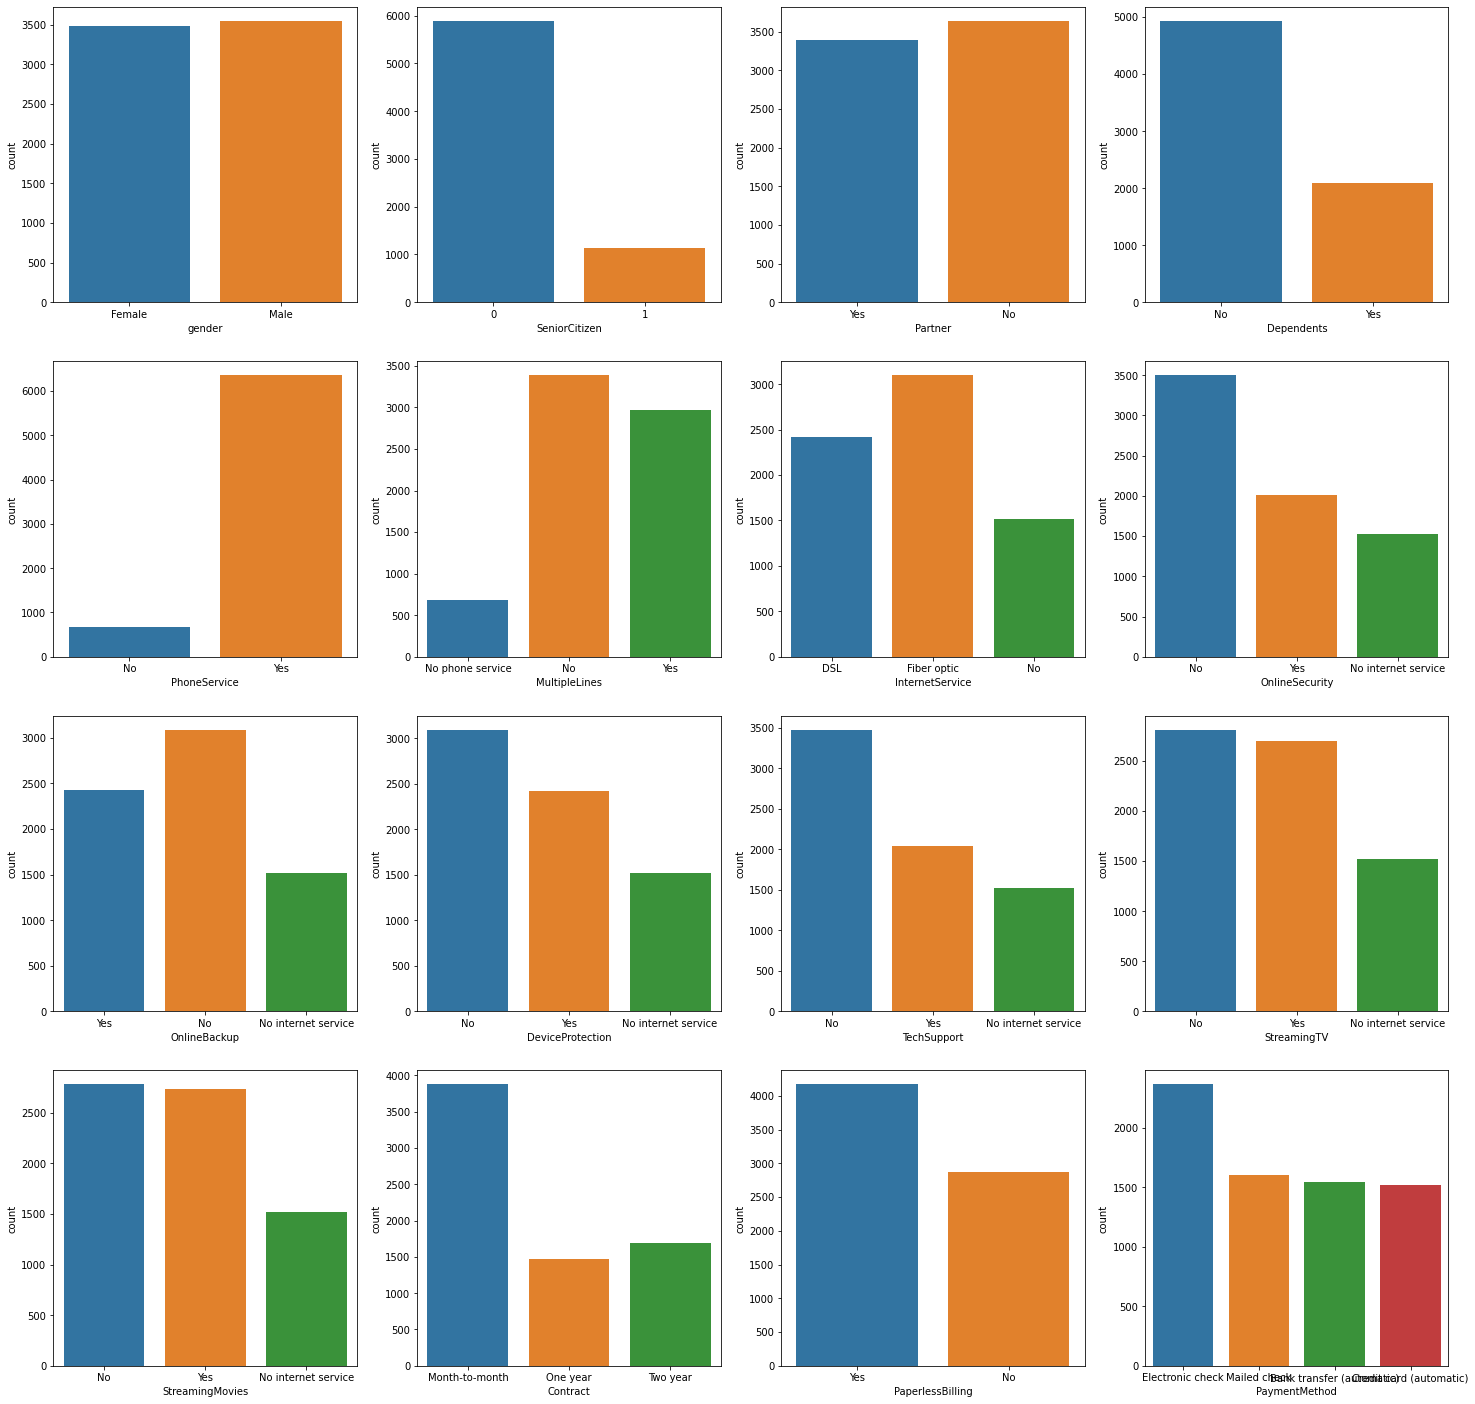

In [16]:
fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (25,25))
axes = axes.flatten()

object_bol = data.dtypes == 'object'

for ax, catplot in zip(axes, data.dtypes[object_bol].index):
    sns.countplot(x=catplot, data=data, ax=ax)

### Checking for numerical features

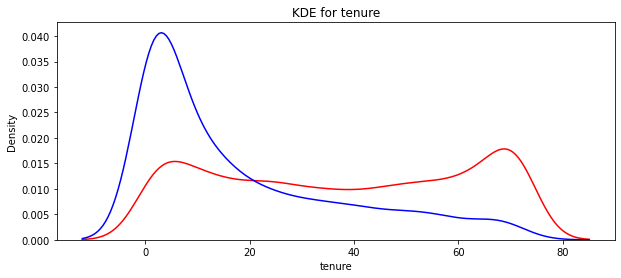

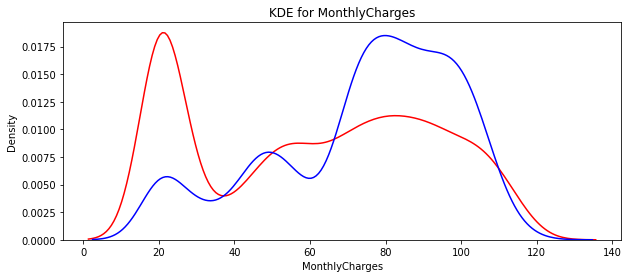

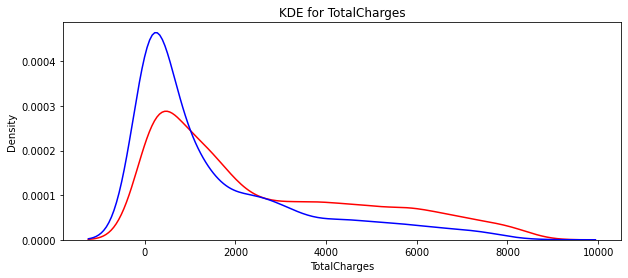

In [17]:
def draw_kdeplot(numeric_feature):
    plt.figure(figsize=(10, 4))
    plt.title("KDE for {}".format(numeric_feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][numeric_feature].dropna(), color= 'red', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][numeric_feature].dropna(), color= 'blue', label= 'Churn: Yes')
    
draw_kdeplot('tenure')
draw_kdeplot('MonthlyCharges')
draw_kdeplot('TotalCharges')

Note : Red colored area is for "Churn:No" and that of Blue is for "Churn:Yes"

From above KDE plot we can conclude that:
1. Clients who have more monthly charges are likely to churn.
2. Tenure and Monthly charges are important features.

**Plotting SeniorCitizen(age) w.r.t. churn**

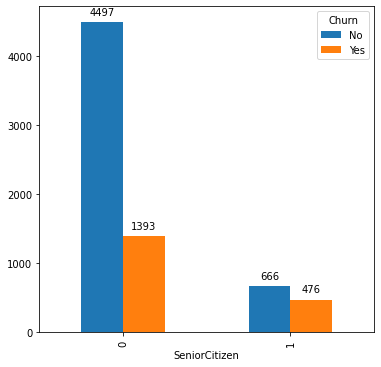

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
churn = data['Churn']
senior_citizen = data['SeniorCitizen']

genderplot = data.groupby([senior_citizen, churn]).size().unstack(level=1).plot(kind='bar', ax=ax)


for p in genderplot.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
      (p.get_x() + p.get_width() / 2., p.get_height()), 
      ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


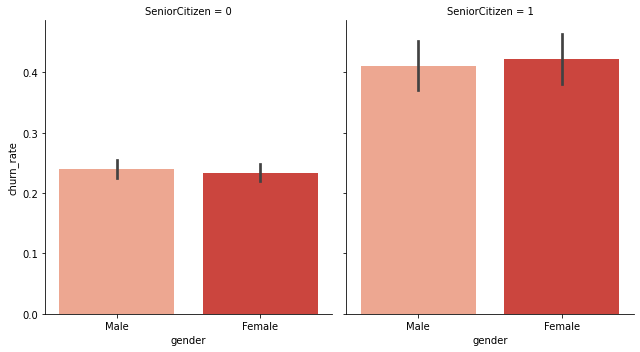

In [19]:
data['churn_rate'] = data['Churn'].replace("No", 0).replace("Yes", 1)
plot = sns.FacetGrid(data, col="SeniorCitizen", height=5, aspect=.9)
ax = plot.map(sns.barplot, "gender", "churn_rate", palette = "Reds")

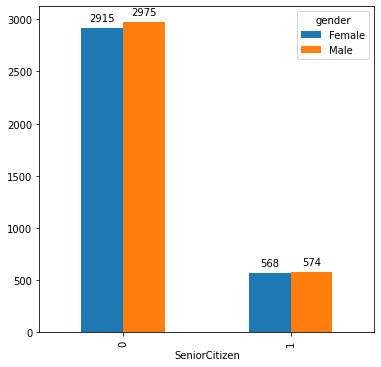

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
gender = data['gender']
senior_citizen = data['SeniorCitizen']

genderplot = data.groupby([senior_citizen, gender]).size().unstack(level=1).plot(kind='bar', ax=ax)


for p in genderplot.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
      (p.get_x() + p.get_width() / 2., p.get_height()), 
      ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

We can observe that:
1. There are total 1142 senior citizens : 476 senior citizens going to churn and 666 don't.
2. Among them, 568 are females and 574 are males
3. There are total 5890 people who are not senior citizens.
4. Among them, 1393 churn and 4497 don't churn.
5. Very less senior citizens are churning with the company.
6. Most of the customers are not senior citizens.


In [21]:
data.drop('churn_rate',axis=1,inplace=True)

In [22]:
#check for correlation
data.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


## Converting categorical features into a standard unit

**I'm using One Hot Encoding technique for converting categorical features into numerical ones.**

In [23]:
# get_dummies() is alternate way for One Hot Encoding..!
data = pd.get_dummies(data,drop_first=True)

In [24]:
#Let's see how our data looks.
data.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [25]:
# checking shape of data
data.shape

(7032, 31)

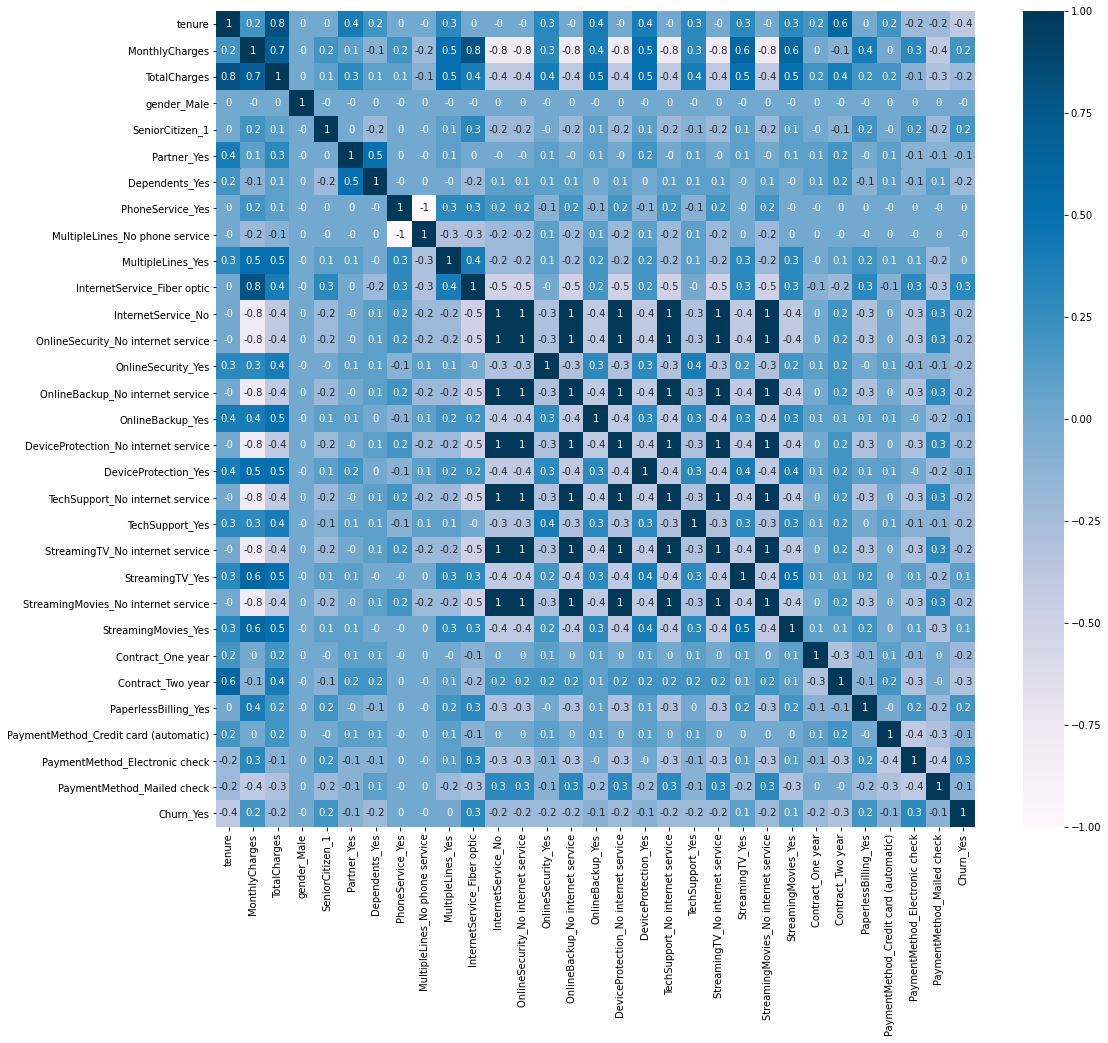

In [26]:
# Correlation matrix
fig = plt.figure(figsize = (17,15))
sns.heatmap(data.corr().round(1), annot=True, cmap="PuBu")

### Locating dependent and independent variable

In [27]:
# X contains features.(Independent variables)
X = data.iloc[:,:-1]
# y contains label.(dependent variable)
y = data.iloc[:,-1]

In [28]:
# let's see how X looks like
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [30]:
X.shape

(7032, 30)

### Applying SMOTE analysis
**As our dataset in very imbalanced, we will use SMOTE to balance minority class.**

In [31]:
over_sample = SMOTE()
X,y = over_sample.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Splitting the data into train and test set

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [49]:
count = Counter(y)
print(count)

Counter({0: 5163, 1: 5163})


In [50]:
print('X_train : ', X_train.shape, ' y_train : ', y_train.shape)
print('X_test  : ', X_test.shape, '  y_test : ', y_test.shape)

X_train :  (8260, 30)  y_train :  (8260,)
X_test  :  (2066, 30)   y_test :  (2066,)


## Applying Machine Learning Models
## 1. Logistic Regression

In [51]:
# creating instance of logistic regression
lr_clf = LogisticRegression()

In [52]:
lr_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred_lr = lr_clf.predict(X_test)

### Accuracy

In [54]:
# Confusion matrix
cm = confusion_matrix(y_test,y_pred_lr)
cm

array([[776, 230],
       [215, 845]])

In [55]:
# Accuracy
lr_acc = accuracy_score(y_test,y_pred_lr)
lr_acc

0.7846079380445304

In [56]:
# Classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1006
           1       0.79      0.80      0.79      1060

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



### Hyperparameter Tuning with Logistic regression

In [57]:
parameters = { 
               "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
               "penalty" : ['l2'],
               "C" : [100, 10, 1.0, 0.1, 0.01]
             }

cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=lr_clf,
                           param_grid = parameters, 
                           cv=cross_val, 
                           scoring='accuracy')

In [58]:
result = grid_search.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWa

In [59]:
# Let's print out best parameters that we get after hyperparameter tuning
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.768644 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


### Forward Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

# create the SequentialFeatureSelector object, and configure the parameters.
sfs = SequentialFeatureSelector(lr_clf, 
           k_features=20, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           cv=5)

# fit the object to the training data.
sfs = sfs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print("Selected_features : ",selected_features)

# print the final prediction score.
print(sfs.k_score_)

Selected_features :

       'tenure','TotalCharges','gender_Male','SeniorCitizen_1', 
       'Partner_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
      
0.8039111111111111

## 2. KNN classifier

In [60]:
# we will fit KNN model by assuming value of n_neighbor as 11. we can assume any value till hyperparameter tuning.
knn_clf = KNeighborsClassifier(n_neighbors=11)
knn_clf.fit(X_train,y_train)
y_pred_knn = knn_clf.predict(X_test)

In [61]:
cm = confusion_matrix(y_test,y_pred_knn)
cm

array([[721, 285],
       [205, 855]])

In [62]:
accuracy_score(y_test,y_pred_knn)

0.7628267182962246

In [63]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1006
           1       0.75      0.81      0.78      1060

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



### Hyperparameter tuning with KNN classifier

In [64]:
# K is our hyper parameter
k = 31
mean_accuracy = np.zeros((k-1))

# Iterating loop till k=31 and getting all the accuracies
for n in range(1,k):
    neighbors = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neighbors.predict(X_test)
    mean_accuracy[n-1] = accuracy_score(y_test, y_hat)

In [65]:
# let's print accuracies
print("mean_accuracy",mean_accuracy)

mean_accuracy [0.78896418 0.75266215 0.77589545 0.75943853 0.76379477 0.75798645
 0.75750242 0.7536302  0.75701839 0.75701839 0.76282672 0.75266215
 0.75798645 0.75217812 0.75943853 0.75024201 0.75121007 0.74975799
 0.75314618 0.74249758 0.74782188 0.74540174 0.74782188 0.74878993
 0.75217812 0.74782188 0.74394966 0.7410455  0.7410455  0.74249758]


In [66]:
# checking maximum accuracy. And it is at index 23. so K value must be 23.
max(mean_accuracy)

0.7889641819941917

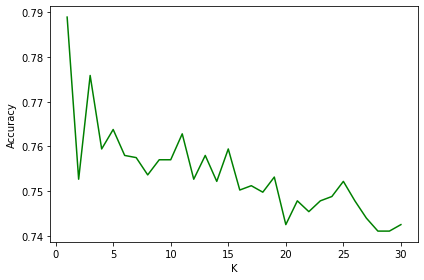

In [67]:
# plotting graph for accuracies.
plt.plot(range(1,k),mean_accuracy,'g')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

In [83]:
# Let's see by taking k = 10 what will be results
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred_knn = knn_clf.predict(X_test)

### Accuracy

In [84]:
# Confusion matrix
cm = confusion_matrix(y_test,y_pred_knn)
cm

array([[760, 246],
       [256, 804]])

In [85]:
# Accuracy
knn_acc = accuracy_score(y_test,y_pred_knn)
knn_acc

0.7570183930300097

In [86]:
# Classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1006
           1       0.77      0.76      0.76      1060

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



## 3. Random Forest Classification

In [72]:
rf_clf = RandomForestClassifier(random_state = 42)

In [73]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred_rf)

0.8654404646660213

### Hyperparameter Tuning with Random Forest Classifier

In [75]:
n_estimators = [300, 500, 800]
max_depth    = [5, 10, 15]
min_samples_split = [5, 10, 15]
min_samples_leaf  = [2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, 
              max_depth = max_depth,  
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

grid_rf = GridSearchCV(rf_clf, hyperF, cv = 3, verbose = 1, n_jobs = -1)

best_rf = grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  9.1min finished


In [76]:
# Let's print out best parameters that we get after hyperparameter tuning
print("Best: %f using %s" % (best_rf.best_score_, best_rf.best_params_))

Best: 0.854842 using {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [77]:
y_pred_best_rf = best_rf.predict(X_test)

### Accuracy

In [78]:
# Accuracy
acc_best_rf = accuracy_score(y_test,y_pred_best_rf)
acc_best_rf

0.8736689254598258

In [79]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best_rf)
cm

array([[888, 118],
       [143, 917]])

## Comparing Models 

In [87]:
models = {'Model':['Logistic regression', 'KNN classifier', 'Random Forest classifier'],
          'Accuracy':[lr_acc, knn_acc, acc_best_rf]}

In [88]:
# Create DataFrame
accuracy_df = pd.DataFrame(models)

In [89]:
accuracy_df

,Model,Accuracy
0,Logistic regression,0.784608
1,KNN classifier,0.757018
2,Random Forest classifier,0.873669


From above we can observe that, Random Forest Classifier performs really well.